# XGBoost Regressor


In [5]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


📊 Evaluacija XGBoost modela:
MAE: 2624.8
MSE: 10516635.86
RMSE: 3242.94
R² Score: -0.3375


<Figure size 1000x600 with 0 Axes>

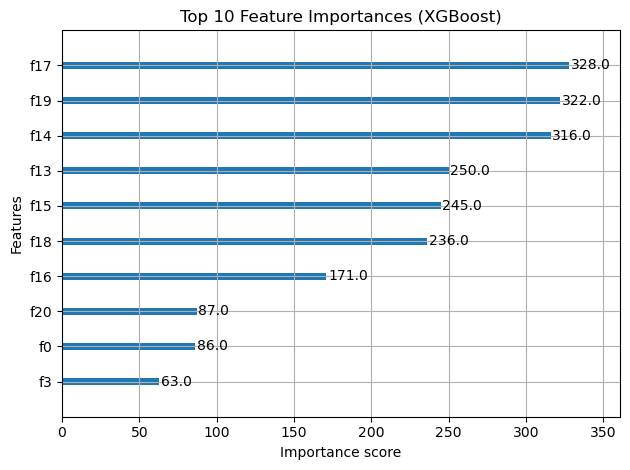

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance

# 1. Učitavanje podataka
df = pd.read_csv("sales_data2.csv")  # tvoj novi CSV s dodatnim featureima

# 2. Definicija X i y
X = df.drop(columns=['Sales_Amount'])
y = np.log1p(df['Sales_Amount'])  # log transformacija targeta

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Kategorikalni i numerički atributi
categorical = ['Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 'Payment_Method']
numerical = [col for col in X.columns if col not in categorical]

# 5. Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# 6. XGBoost pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42))
])

# 7. Treniranje modela
model.fit(X_train, y_train)

# 8. Predikcija
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # vraćanje na originalnu skalu
y_test_actual = np.expm1(y_test)

# 9. Evaluacija
print("📊 Evaluacija XGBoost modela:")
print("MAE:", round(mean_absolute_error(y_test_actual, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test_actual, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_actual, y_pred)), 2))
print("R² Score:", round(r2_score(y_test_actual, y_pred), 4))

# 10. Feature Importance (ako želiš vidjeti koje značajke su najvažnije)
xgb_model = model.named_steps['regressor']
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()
